In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from numpy import nan,inf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
import xgboost as xgb
import seaborn as sns


In [3]:
df = pd.read_csv('training_dataset.csv') 
df.head(6)

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Label
0,58:50.7,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
1,58:50.3,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
2,58:49.9,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
3,58:49.5,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
4,58:49.1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
5,58:48.7,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536138 entries, 0 to 536137
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         536138 non-null  object 
 1   FQDN_count        536138 non-null  int64  
 2   subdomain_length  536138 non-null  int64  
 3   upper             536138 non-null  int64  
 4   lower             536138 non-null  int64  
 5   numeric           536138 non-null  int64  
 6   entropy           536138 non-null  float64
 7   special           536138 non-null  int64  
 8   labels            536138 non-null  int64  
 9   labels_max        536138 non-null  int64  
 10  labels_average    536138 non-null  float64
 11  longest_word      536124 non-null  object 
 12  sld               536138 non-null  object 
 13  len               536138 non-null  int64  
 14  subdomain         536138 non-null  int64  
 15  Label             536138 non-null  int64  
dtypes: float64(2), int64

In [5]:
# df=df.drop('timestamp',axis=1)

In [6]:
# df.head()

In [7]:
categorical_column=[i for i in df.columns if df[i].dtype=="object"]
categorical_column

['timestamp', 'longest_word', 'sld']

In [8]:
for cat in categorical_column:
    df=df.drop(cat ,axis=1)
df    

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Label
0,24,7,0,10,8,2.054029,6,6,7,3.166667,11,1,1
1,24,7,0,10,8,2.054029,6,6,7,3.166667,11,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,1
3,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,1
4,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536133,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,0
536134,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,0
536135,25,8,0,10,9,2.556642,6,6,7,3.333333,12,1,0
536136,25,8,0,10,9,2.556642,6,6,7,3.333333,12,1,0


In [9]:
# categorical_column=[i for i in df.columns if df[i].dtype=="object"]

# le = LabelEncoder()
# for f in categorical_column: 
#     df[f] = le.fit_transform(df[f])
# df.head()

In [10]:
# splitting features and labels
X = df.drop('Label',axis=1) 
y = df['Label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## IsolationForest Classifier

In [12]:
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12),
                    max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred[y_pred==-1]=0

Accuracy = 0.5869486825580383 
 Recall = 0.9260995278863313 
 Percision = 0.5778853743797925 
 f1_score = 0.7116818414588632

Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.17      0.27     72304
           1       0.58      0.93      0.71     88538

    accuracy                           0.59    160842
   macro avg       0.62      0.55      0.49    160842
weighted avg       0.61      0.59      0.51    160842



<AxesSubplot:>

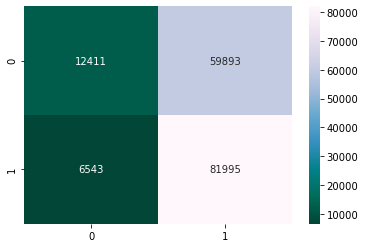

In [38]:
accuracy = metrics.accuracy_score(y_test,y_pred)
recall= metrics.recall_score(y_test,y_pred)
precision=metrics.precision_score(y_test,y_pred)
f1score=metrics.f1_score(y_test,y_pred)

print(f"Accuracy = {accuracy} \n Recall = {recall} \n Percision = {precision} \n f1_score = {f1score}\n")
print("Classification report: \n",metrics.classification_report(y_test,y_pred))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, cmap='PuBuGn_r', fmt='g')

## RandomForest Classifier

In [39]:
rf_cls = RandomForestClassifier(n_estimators=100)
rf_cls.fit(X_train.values, y_train.values)
y_pred = rf_cls.predict(X_test)

Accuracy = 0.8220303154648662 
 Recall = 0.9996385732679753 
 Percision = 0.7558219967719622 
 f1_score = 0.8607983971756056

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75     72304
           1       0.76      1.00      0.86     88538

    accuracy                           0.82    160842
   macro avg       0.88      0.80      0.81    160842
weighted avg       0.87      0.82      0.81    160842

Confusion matrix: 
 [[43711 28593]
 [   32 88506]]


<AxesSubplot:>

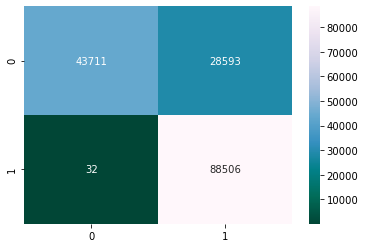

In [40]:
accuracy = metrics.accuracy_score(y_test,y_pred)
recall= metrics.recall_score(y_test,y_pred)
precision=metrics.precision_score(y_test,y_pred)
f1score=metrics.f1_score(y_test,y_pred)

print(f"Accuracy = {accuracy} \n Recall = {recall} \n Percision = {precision} \n f1_score = {f1score}\n")
print("Classification report: \n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix: \n",metrics.confusion_matrix(y_test,y_pred))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, cmap='PuBuGn_r', fmt='g')

In [41]:
with open('models\model_rf.sav', 'wb') as file:
    pickle.dump(rf_cls, file)

## XGboost

In [42]:
clf_xg = xgb.XGBClassifier(
    n_estimators=200,
    n_jobs=4,
    max_depth=9,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    tree_method="gpu_hist",
    missing=-999,
    use_label_encoder=False,
)

print("Fitting a xgboost model...")

clf_xg.fit(X_train.values, y_train.values)
y_pred = clf_xg.predict(X_test)

Fitting a xgboost model...
[22:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy = 0.8220116636201987 
 Recall = 0.9995821003410965 
 Percision = 0.75582447989615 
 f1_score = 0.8607790692019647

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75     72304
           1       0.76      1.00      0.86     88538

    accuracy                           0.82    160842
   macro avg       0.88      0.80      0.81    160842
weighted avg       0.87      0.82      0.81    160842

Confusion matrix: 
 [[43713 28591]
 [   37 88501]]


<AxesSubplot:>

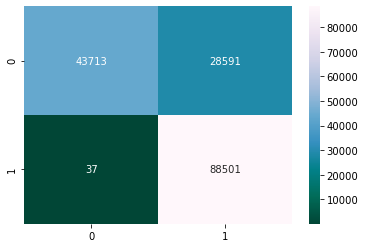

In [43]:
accuracy = metrics.accuracy_score(y_test,y_pred)
recall= metrics.recall_score(y_test,y_pred)
precision=metrics.precision_score(y_test,y_pred)
f1score=metrics.f1_score(y_test,y_pred)

print(f"Accuracy = {accuracy} \n Recall = {recall} \n Percision = {precision} \n f1_score = {f1score}\n")
print("Classification report: \n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix: \n",metrics.confusion_matrix(y_test,y_pred))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, cmap='PuBuGn_r', fmt='g')